# La classification en analyse du langage naturel

<img src="https://cdn.pixabay.com/photo/2017/09/07/10/07/english-2724442_960_720.jpg" alt="drawing" width="500"/>

Pour **l'analyse du langage naturel**, le **workflow classique** de machine learning doit **être adapté**. En particulier, il faut ajouter des étapes de **pré-traitement**.

## Activité de recherche d'informations :

- Qu'est qu'un document en NLP ? un corpus ?
Un document en NLP (Traitement Automatique du Langage Naturel) est un ensemble de mots ou de phrases qui décrivent une information ou une idée.

Un corpus est un ensemble de documents qui peuvent être utilisés pour des analyses linguistiques ou pour entraîner des modèles de NLP.


- Qu'est-ce la tokenisation ?
La tokenisation consiste à diviser un document en séquences plus petites, appelées tokens, qui peuvent être des mots, des phrases, des phrases entières, etc.

- En quoi consiste le sac de mots (bag-of-word) ?
Le sac de mots (bag-of-words) est une représentation simplifiée d'un document qui ne conserve que le nombre d'occurrences des mots dans le document, sans conserver l'ordre des mots.

- A quoi correspondent les n-grams ?
Les n-grams sont des séquences de n mots consécutifs dans un document. Ils peuvent être utilisés pour améliorer les modèles de NLP en prenant en compte la séquence des mots.

- Qu'est-ce que Tf-idf ?
Tf-idf (term frequency-inverse document frequency) est une métrique qui mesure l'importance d'un mot dans un document par rapport à l'ensemble des documents dans un corpus.


- Qu'est-ce que la racinisation/stemmatisation ? Quelle est la différence avec la lemmatisation ?
La racinisation/stemmatisation est un processus qui consiste à réduire les mots à leur forme de base ou à leur racine. La lemmatisation est un processus similaire mais qui prend en compte la forme grammaticale d'un mot pour le réduire à sa forme de base.

- Trouver 3 noms de bibliothèques pour le NLP en Python
Les bibliothèques NLP pour Python incluent :

NLTK (Natural Language Toolkit)
spaCy
Gensim

## Activité de classification en NLP :

<img src="https://cdn.pixabay.com/photo/2015/12/09/17/12/popcorn-1085072_960_720.jpg" alt="drawing" width="500"/>

Dans cette activité, nous allons travailler sur des avis au sujet de films (base de données IMDB). L'objectif est de catégoriser ces avis suivant qu'ils sont **positifs** ou **négatifs** (analyse de sentiment).

- Récupérer le jeu de données `IMDB Dataset.csv`

- Analyser le contenu et le déséquilibre de classes

- Créer un bag of words à l'aide de la classe `CountVectorizer()` de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Ne pas prendre en compte les mots qui apparaissent plus de 5 fois par phrase et utiliser une liste de stop-words

- Effectuer un entrainement de modèles de classification pour prédire la classe "positif" ou "négatif"

- Analyser les métriques de qualité d'entrainement du modèle

- Reprendre le workflow d'entrainement du modèle en ajoutant une étape de pré-traitement de stemmatisation : utiliser une classe de stemmatisation de la bibliothèque `nltk` en la testant d'abord sur quelques mots pour voir son fonctionnement. Analyser les métriques de classification et comparer aux résultats précédents

- Même chose avec la lemmatisation toujours avec la bibliothèque `nltk`

- Même chose en utilisant des bigrams pour le bag of words

- Même chose en utilisant des bigrams pour le Tf-idf

### Importation du jeu de données

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

df = pd.read_csv("IMDB Dataset.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Repartition de la variable à predire

In [3]:
df["sentiment"].value_counts(normalize=True) * 100

positive    50.0
negative    50.0
Name: sentiment, dtype: float64

Les deux classes sont equitablement reparties, donc pas besoin de sur representé ou sous representé une classe

In [4]:
# Nb total de mots dans les reviews

df['nb_words'] = df['review'].str.split()
df['nb_words'].apply(len).sum()

11557847

### Création un bag of words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_df=5, stop_words="english")
X = vectorizer.fit_transform(df["review"])

In [6]:
X.shape

(50000, 67943)

In [7]:
vectorizer.vocabulary_

{'penitentary': 44905,
 'inwards': 30584,
 'gangstas': 23830,
 'scuffles': 52886,
 'polari': 46266,
 'terrificly': 59693,
 'murals': 40584,
 'johanson': 31603,
 'petter': 45266,
 'schnitzler': 52573,
 'discerns': 16916,
 'grenier': 25669,
 'selflessness': 53186,
 'seahunt': 52947,
 '950': 1041,
 'obsessives': 42578,
 'parachutes': 44237,
 'finsished': 22008,
 'mercs': 38446,
 'schemed': 52472,
 'schmucks': 52562,
 'loneley': 35583,
 'moeller': 39563,
 'selfs': 53189,
 'bratwurst': 8356,
 'tils': 60349,
 'krieger': 33518,
 'gms': 24926,
 'mehehe': 38199,
 'bolls': 7760,
 'cromed': 14270,
 'scheisse': 52464,
 'wiff': 66034,
 'bowdler': 8163,
 'bowdlerization': 8166,
 'recommand': 49165,
 'snazzier': 55353,
 'obee': 42494,
 'newbury': 41537,
 'berkshire': 6582,
 'haggery': 26438,
 'pickers': 45581,
 'lithgows': 35311,
 'sneery': 55367,
 'waite': 65065,
 'fairbrass': 20990,
 'qaulen': 48058,
 'rajnikanth': 48576,
 'wwwaaaaayyyyy': 66839,
 'crissakes': 14199,
 'worldfest': 66626,
 'twizzler

### Pré-traitement, entraînement et prédiction du modèle de classification

Constitution du pipeline de pré-traitement et d'entraînement du modèle de machine learning.

Modèle choisi : modèle naïf de Bayes (MultinomialNB), classifieur réputé efficace avec les données textuelles.

In [8]:
from sklearn.model_selection import train_test_split

y = df['sentiment']
X = df['review']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("embeding", CountVectorizer()),
    ("clf", MultinomialNB())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('embeding', CountVectorizer()), ('clf', MultinomialNB())])

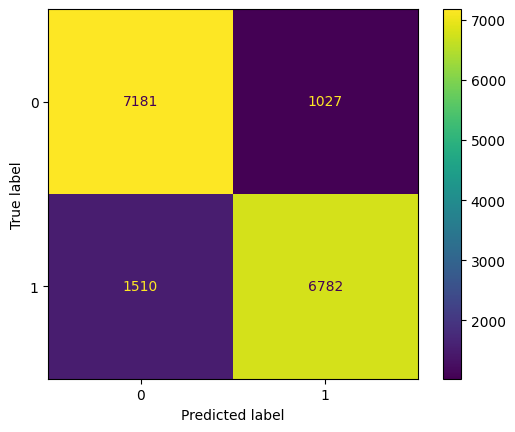

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [11]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      8208
    positive       0.87      0.82      0.84      8292

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500





### Ajout une étape de pré-traitement de stemmatisation

In [17]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

# Define the stemmer
stemmer = SnowballStemmer("english")

# Define a custom tokenizer that uses the stemmer
def stem_tokenize(text):
    words = word_tokenize(text)
    return [stemmer.stem(word) for word in words]

# Create the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', tokenizer=stem_tokenize)),
    ("clf", MultinomialNB())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<function stem_tokenize at 0x2c8ad9360>)),
                ('clf', MultinomialNB())])

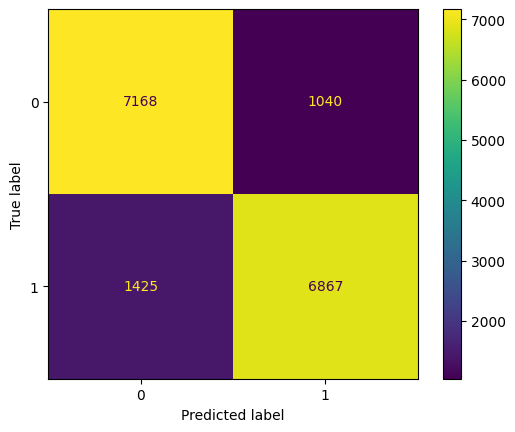

In [18]:
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      8208
    positive       0.87      0.83      0.85      8292

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



### Lemmatization

In [20]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/esdrasassikidana/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/esdrasassikidana/nltk_data...


True

In [22]:
from nltk.stem import WordNetLemmatizer
# Define the stemmer
lemmatizer = WordNetLemmatizer()

# Define a custom tokenizer that uses the stemmer
def lemmatizer_tokenize(text):
    words = word_tokenize(text)
    return [lemmatizer.lemmatize(word) for word in words]

# Create the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', tokenizer=lemmatizer_tokenize)),
    ("clf", MultinomialNB())
])

pipeline.fit(X_train, y_train)

/Users/esdrasassikidana/miniforge3/envs/envTF2/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<function lemmatizer_tokenize at 0x2c75b12d0>)),
                ('clf', MultinomialNB())])

              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      8208
    positive       0.87      0.83      0.85      8292

    accuracy                           0.85     16500
   macro avg       0.86      0.85      0.85     16500
weighted avg       0.86      0.85      0.85     16500



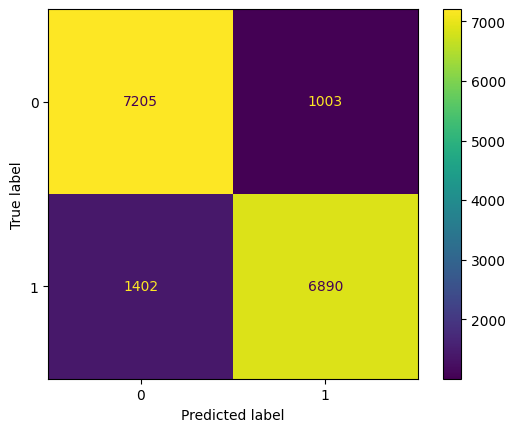

In [23]:
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, y_pred))

### Use of bigrams pour le bag of words

In [27]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words="english", ngram_range=(2,2))),
    ("clf", MultinomialNB())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english')),
                ('clf', MultinomialNB())])

              precision    recall  f1-score   support

    negative       0.88      0.91      0.90      8208
    positive       0.91      0.88      0.89      8292

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500



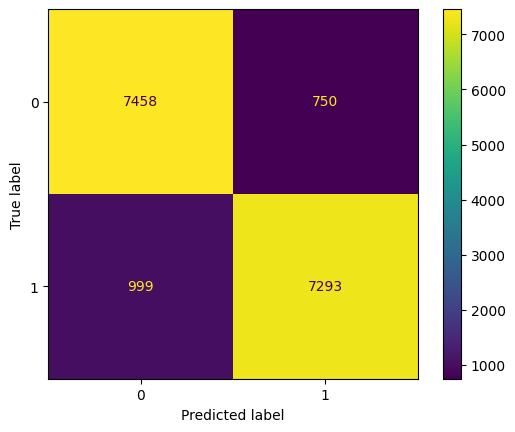

In [26]:
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, y_pred))

### Bigrams pour le Tf-idf

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer( ngram_range=(1,2))),
    ("clf", MultinomialNB())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

              precision    recall  f1-score   support

    negative       0.87      0.92      0.89      8208
    positive       0.91      0.86      0.89      8292

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500



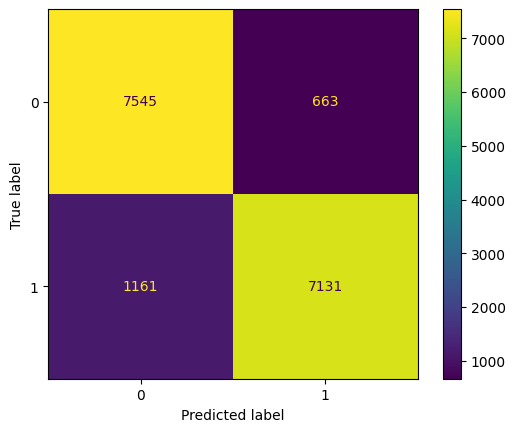

In [35]:
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, y_pred))